In [73]:
# load data and consider two features (Economy..GDP.per.capita, Freedom) and the output to be estimated (Happiness.Score)
import csv

def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1  
              
    inputs =  [ [ 0 for _ in range(len(inputVariabNames))  ] for _ in range(len(data)) ]
    for j in range(len(inputVariabNames)):
        selectedVariable = dataNames.index(inputVariabNames[j])
        for i in range(len(data)): 
            inputs[i][j] = float(data[i][selectedVariable])
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs


import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

In [74]:
# check the liniarity
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def plot3Ddata(feature1, feature2, outputs):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = feature1
    y = feature2
    z = outputs

    ax.set_xlabel('GDP per capita')
    ax.set_ylabel('Freedom')
    ax.scatter3D(x, y, z, color = 'pink')

    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    # ax.legend()

In [75]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

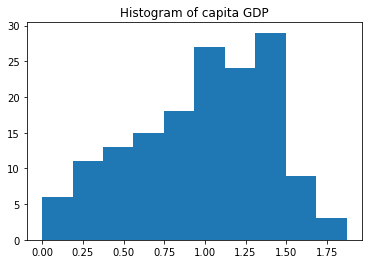

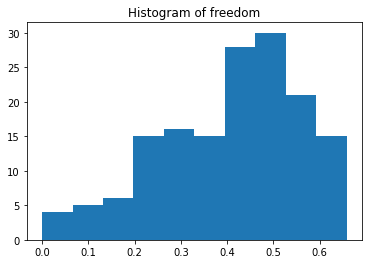

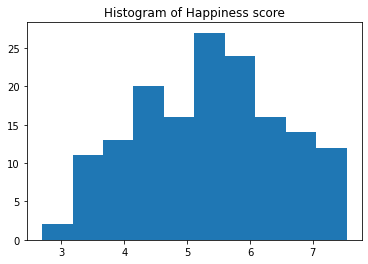

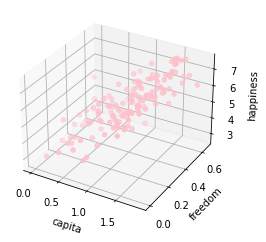

In [76]:
feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]
# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs)

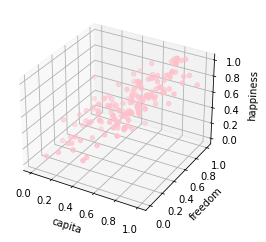

In [77]:
# data normalisation
# map the feature's values to [0,1]
def normalisation(inputs, outputs):
    feature1 = [row[0] for row in inputs]
    feature2 = [row[1] for row in inputs]
    minFeat1 = min(feature1)
    maxFeat1 = max(feature1)
    minFeat2 = min(feature2)
    maxFeat2 = max(feature2)
    minFeatO = min(outputs)
    maxFeatO = max(outputs)
    scaledFeatures1 = [(feat - minFeat1) / (maxFeat1 - minFeat1) for feat in feature1]
    scaledFeatures2 = [(feat - minFeat2) / (maxFeat2 - minFeat2) for feat in feature2]
    scaledOutputs = [(feat - minFeatO) / (maxFeatO - minFeatO) for feat in outputs]
    return scaledFeatures1, scaledFeatures2, scaledOutputs

feature1scaled, feature2scaled, outputsScaled = normalisation(inputs, outputs)

plot3Ddata(feature1scaled, feature2scaled, outputsScaled)


In [78]:
def plot3Ddata2(feat1Train, feat2Train, trainOutputs, feat1Valid, feat2Valid, vOutputs):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = feat1Train
    y = feat2Train
    z = trainOutputs
    ax.scatter3D(x, y, z, color = 'pink', label = 'train')
    x2 = feat1Valid
    y2 = feat2Valid
    z2 = vOutputs
    ax.scatter3D(x2, y2, z2, color = 'cyan', label = 'validation')
    ax.legend()

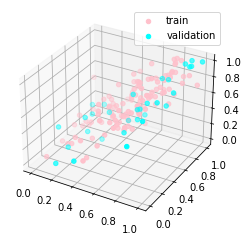

In [79]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

feature1Train, feature2Train, outputsTrain = normalisation(trainInputs, trainOutputs)
feature1Test, feature2Test, outputsTest = normalisation(validationInputs, validationOutputs)

for i in range(len(trainInputs)):
    trainInputs[i][0] = feature1Train[i] 
    trainInputs[i][1] = feature2Train[i]
for i in range(len(validationInputs)):
    validationInputs[i][0] = feature1Test[i] 
    validationInputs[i][1] = feature2Test[i]



plot3Ddata2(feature1Train, feature2Train, outputsTrain, feature1Test, feature2Test, outputsTest)




In [80]:
import random
class MyBGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []

    # simple batch GD
    def fit(self, x_all, y_all, learningRate = 0.01, noEpochs = 10000, batchSize = 10):

        indexes = random.sample(range(0,len(x_all)), batchSize)
        x = [x_all[i] for i in indexes]
        y = [y_all[i] for i in indexes]

        num_features = len(x[0])
        num_samples = len(x)

        self.coef_ = [0.0 for _ in range(num_features)]  # w coefficients w1, w2, ...

        for epoch in range(noEpochs):
            ycomputed = []
            for i in range(num_samples):
                ycomputed.append(self.eval(x[i]))  # estimate all the outputs
            for j in range(len(self.coef_)):  # for each coefficient (w)
                crtError = 0
                for i in range(num_samples):
                    crtError += (ycomputed[i] - y[i]) * x[i][j]  # calculate the sum (sum ((computed - real) * feat[j]) )
                crtError = crtError / num_samples  # divide by number of samples
                self.coef_[j] = self.coef_[j] - learningRate * crtError  # update the coefficient
            # calculate the intercept (w0) for the whole batch:
            crtError0 = 0
            for i in range(num_samples):
                crtError0 += (ycomputed[i] - y[i]) * 1
            crtError0 = crtError0 * 1 / num_samples

            self.intercept_ = self.intercept_ - learningRate * crtError0

    def eval(self, xi):
        yi = self.intercept_
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi 

    def predict(self, x):
        yComputed = [self.eval(xi) for xi in x]
        return yComputed

In [81]:
def plot3Ddata3(feature1, feature2, outputs):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = feature1
    y = feature2
    z = outputs

    ax.set_xlabel('GDP per capita')
    ax.set_ylabel('Freedom')
    ax.scatter3D(x, y, z, color = 'pink')

    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    # ax.legend()

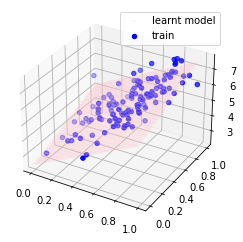

In [82]:
# identify (by training) the regressor

# using developed code
regressor = MyBGDRegression()

regressor.fit(trainInputs, trainOutputs)

#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1Train)
step1 = (max(feature1Train) - min(feature1Train)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2Train)
step2 = (max(feature2Train) - min(feature2Train)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = feature1Train
y = feature2Train
z = trainOutputs

ax.scatter3D(xref1, xref2, yref, c = 'pink', marker = '_', label = 'learnt model', alpha = 0.2)
ax.scatter3D(x, y, z, color = 'b', label = 'train')
ax.legend()


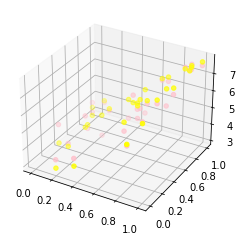

In [83]:
computedTestOutputs = regressor.predict(validationInputs)

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = [row[0] for row in validationInputs]
y = [row[1] for row in validationInputs]
z = validationOutputs
ax.scatter3D(x, y, z, color = 'pink')
z2 = computedTestOutputs
ax.scatter3D(x, y, z2, color = 'yellow')


In [84]:
error = 0.0
for t1, t2 in zip(computedTestOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)


prediction error (manual):  0.3176962102313879
